# Evaluierung des SIFT Detektors

In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import pickle
from typing import List, Tuple, Dict, Any
import eval_repeatability as er
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

### Lade Daten

In [26]:
detector_name='sift'

In [3]:
with open('outputs/repeatability_{}.pkl'.format(detector_name), 'rb') as dst:
    data = pickle.load(dst, encoding='utf-8')
    

### Plot Funktionen

In [17]:
def plot_num_keypoints_per_image(ax, data_set, detector_name, set_name):
    num_kpts_per_image = data_set['num_kpts_per_image']
    avg = data_set['num_kpts_per_image_avg']
    std = data_set['num_kpts_per_image_std']
    
    ax.axhline(y=avg+std, color='orange', linestyle=':', label='sigma +')
    ax.axhline(y=avg, color='red', label='mean {}'.format(avg))
    ax.axhline(y=avg-std, color='orange', linestyle=':', label='sigma -')
    ax.bar(np.arange(len(num_kpts_per_image)), num_kpts_per_image);
    ax.set_title('{} - {}'.format(set_name, detector_name))
    ax.set_xlabel('Das i-te Bild');
    ax.set_ylabel('Anzahl gefundener Keypunkte in Bild i');
    ax.legend();
    return ax

In [23]:
def plot_num_repeatable_keypoints(ax, data_set, detector_name, collection_name, set_name):
    epsilons = list(data_set['epsilon'].keys())
    for eps in epsilons:
        y = data_set['epsilon'][eps]['cum_repeatable_kpts']
        y = y / y[0]
        x = len(y)
    
        ax.plot(np.arange(len(y)), y, label='Epsilon={}'.format(eps))
    ax.set_title('{} - {}: Wiederholbarkeit für Epsilon'.format(detector_name, set_name))
    ax.set_xlabel('Anzahl Bilder')
    ax.set_ylabel('Prozent wiederholbare Keypunkte')
    ax.legend();
    return ax

In [24]:
def plot_metrics(data, collection_name: str, set_name: str, detector_name: str):
    data_set = data[collection_name][set_name]

    fig, axes = plt.subplots(nrows=2, ncols=1)
    axes[0] = plot_num_keypoints_per_image(axes[0], data_set, detector_name, set_name)
    axes[1] = plot_num_repeatable_keypoints(axes[1], data_set, detector_name, collection_name, set_name)

### Erklärung:
- Der erste Graph zeigt die **Anzahl der gefundenen Keypunkte pro Bild** innerhalb eines Sets an. Die rote Linie ist der Durchschnitt an gefundenen Keypunkten über allen Bildern. Die gelbe Linie ist der Bereich der Standardabweichung.
- **Prozentualer Anteil an Keypunkten, die **bis zum i-ten Bild **wiederholbar sind**, das heißt in allen Bildern bis zum zum i-ten Bild gefunden wurden. Die maximale Distanz der Positionen eines Keypunktpaares darf $\epsilon$ Pixel nicht überschreiten.

### Kollektion: Webcam

In [35]:
collection_name='webcam'

### Set: Chamonix

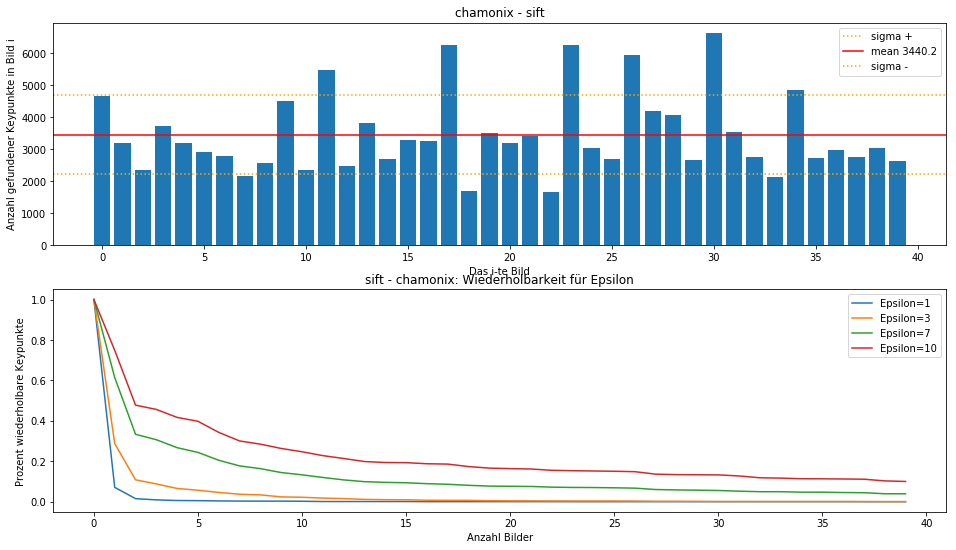

In [28]:
set_name = 'chamonix'
plt.rcParams['figure.figsize'] = [16, 9]
plot_metrics(data, collection_name, set_name, detector_name)

In [ ]:
# TODO
# Zeige die weiderholbaren Keypunkte aus dem ersten und dem letzten 
# Bild an - nebeneinander oder übereinander.

### Set Courbevoie

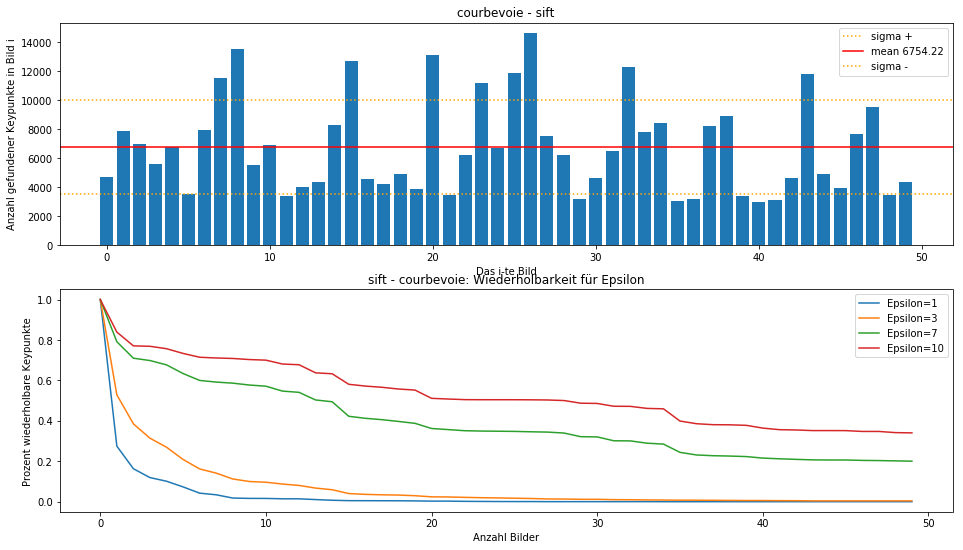

In [29]:
set_name='courbevoie'
plt.rcParams['figure.figsize'] = [16, 9]
plot_metrics(data, collection_name, set_name, detector_name)

### Set Frankfurt

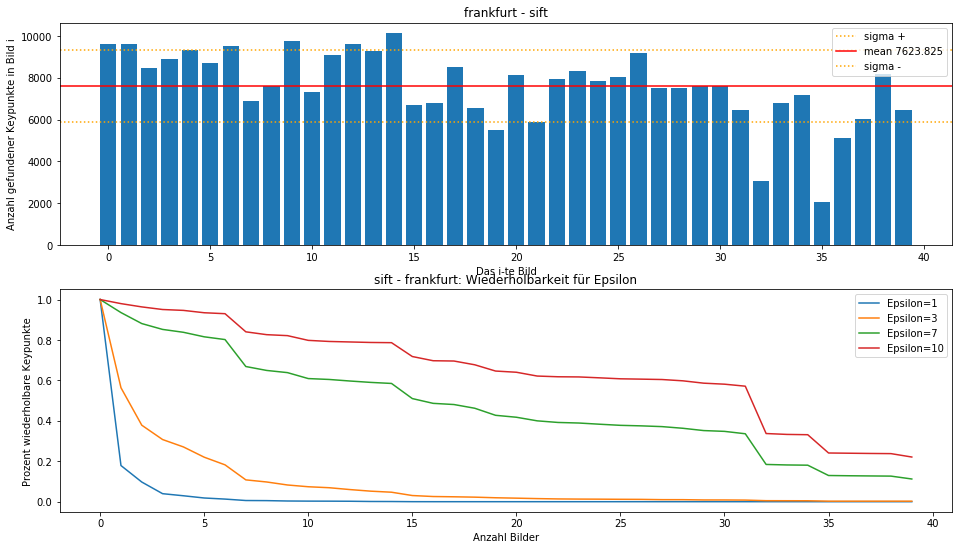

In [30]:
set_name='frankfurt'
plt.rcParams['figure.figsize'] = [16, 9]
plot_metrics(data, collection_name, set_name, detector_name)

### Set Mexico

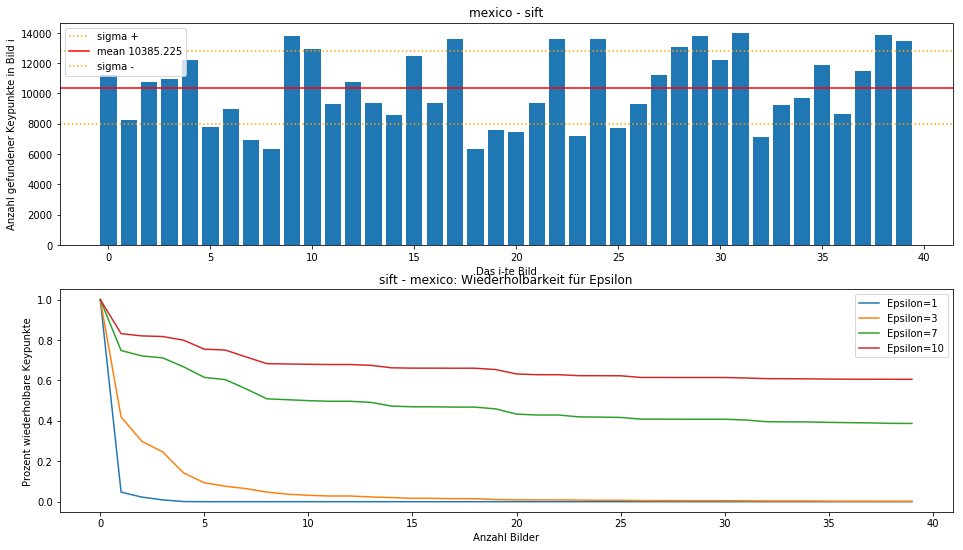

In [31]:
set_name='mexico'
plt.rcParams['figure.figsize'] = [16, 9]
plot_metrics(data, collection_name, set_name, detector_name)

### Set Panorama

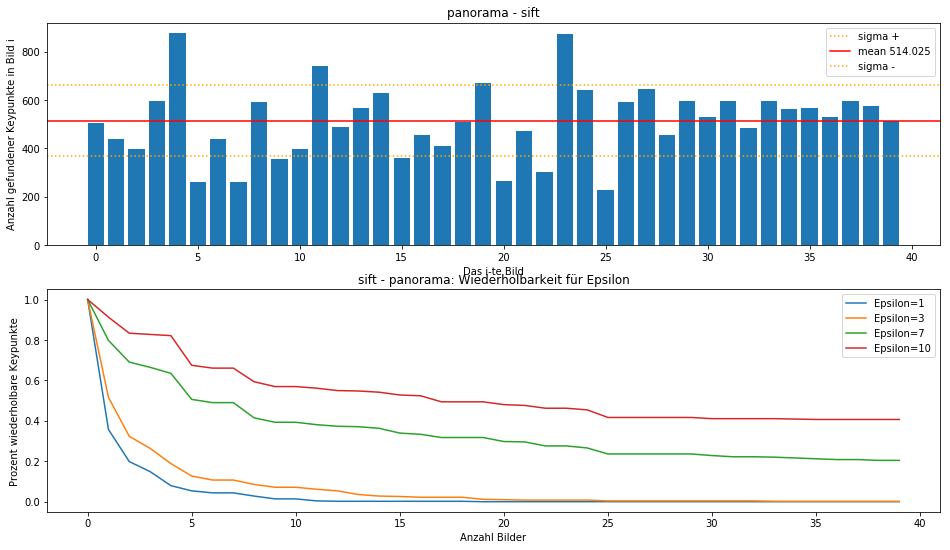

In [32]:
set_name='panorama'
plt.rcParams['figure.figsize'] = [16, 9]
plot_metrics(data, collection_name, set_name, detector_name)

### Set StLouis

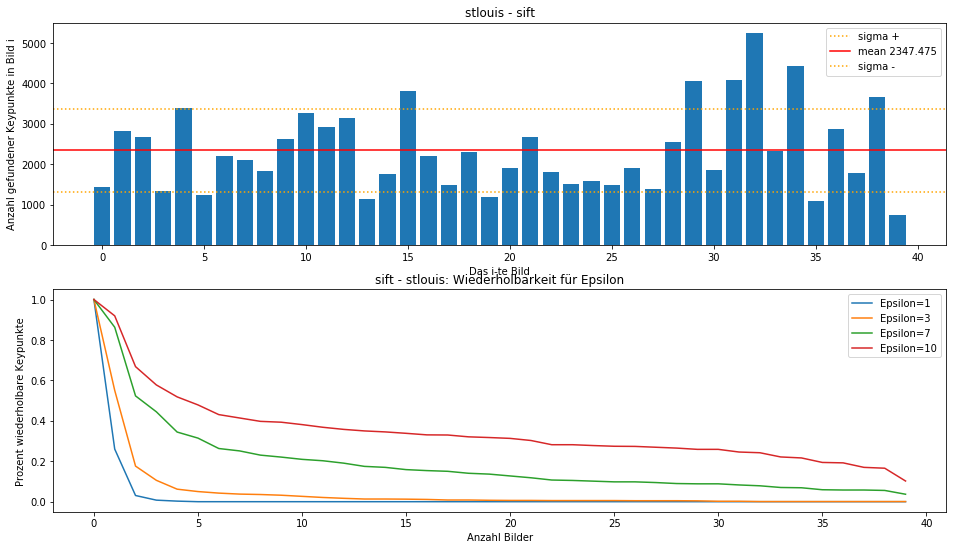

In [33]:
set_name='stlouis'
plt.rcParams['figure.figsize'] = [16, 9]
plot_metrics(data, collection_name, set_name, detector_name)